<a href="https://colab.research.google.com/github/jaypro26022002/UFO-detection-data-mining/blob/main/BaiTapLonNhom8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [43]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Loại bỏ SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # or "raise" to raise an exception

# Lọc ra các cảnh báo khác nếu cần
warnings.filterwarnings("ignore")

In [44]:
from google.colab import files
uploaded = files.upload()

Saving complete.csv to complete (1).csv


In [45]:
df = pd.read_csv('complete.csv', error_bad_lines=False)
df

Skipping line 878: expected 11 fields, saw 12
Skipping line 1713: expected 11 fields, saw 12
Skipping line 1815: expected 11 fields, saw 12
Skipping line 2858: expected 11 fields, saw 12
Skipping line 3734: expected 11 fields, saw 12
Skipping line 4756: expected 11 fields, saw 12
Skipping line 5389: expected 11 fields, saw 12
Skipping line 5423: expected 11 fields, saw 12
Skipping line 5614: expected 11 fields, saw 12
Skipping line 5849: expected 11 fields, saw 12
Skipping line 6093: expected 11 fields, saw 12
Skipping line 7516: expected 11 fields, saw 12
Skipping line 7626: expected 11 fields, saw 12
Skipping line 8893: expected 11 fields, saw 12
Skipping line 9015: expected 11 fields, saw 12
Skipping line 9571: expected 11 fields, saw 12
Skipping line 9620: expected 11 fields, saw 12
Skipping line 9751: expected 11 fields, saw 12
Skipping line 10157: expected 11 fields, saw 12
Skipping line 10427: expected 11 fields, saw 12
Skipping line 12035: expected 11 fields, saw 12
Skipping li

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833


In [46]:
df.shape

(88679, 11)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


Data cleaning

Check for data types

In [48]:
# tách cột ngày giờ thành cột ngày và giờ

# Thay thế '24:00' bằng '00:00' trong cột ngày giờ
df['datetime'] = df['datetime'].str.replace('24:00', '00:00')

# Chuyển đổi cột 'datetime' thành loại datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Tách cột ngày giờ thành các cột ngày và giờ riêng biệt
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# In khung dữ liệu đã sửa đổi
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949-10-10,21:00:00
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955-10-10,17:00:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00


In [49]:
# tạo cột "thời lượng (phút)" và "thời lượng (giờ)"
df['duration (minutes)'] = np.nan
df['duration (hours)'] = np.nan
for i in range(len(df['duration (seconds)'])):
    try:
        df['duration (minutes)'].iloc[i] = float(df['duration (seconds)'].iloc[i]) / 60
        df['duration (hours)'].iloc[i] = float(df['duration (seconds)'].iloc[i]) / 3600
    except:
        # Xóa tất cả các ký tự ngoại trừ số và dấu chấm
        df['duration (seconds)'].iloc[i] = re.sub(r"[^0-9.]", "", df['duration (seconds)'].iloc[i])
        df['duration (minutes)'].iloc[i] = float(df['duration (seconds)'].iloc[i]) / 60
        df['duration (hours)'].iloc[i] = float(df['duration (seconds)'].iloc[i]) / 3600

In [50]:
print(df['duration (minutes)'].isnull().sum())
print(df['duration (hours)'].isnull().sum())

2
2


In [51]:
# Chuyển đổi loại ngày đăng cột thành ngày
df['date posted'] = pd.to_datetime(df['date posted'], format='%m/%d/%Y')
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,duration (minutes),duration (hours)
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30:00,45.000000,0.750000
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00:00,120.000000,2.000000
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00:00,0.333333,0.005556
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00:00,0.333333,0.005556
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00:00,15.000000,0.250000


In [52]:
df.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted             datetime64[ns]
latitude                        object
longitude                      float64
date                            object
time                            object
duration (minutes)             float64
duration (hours)               float64
dtype: object

In [53]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude', 'date', 'time', 'duration (minutes)', 'duration (hours)'],
      dtype='object')

In [54]:
for i in range(len(df)):
    try:
        df['latitude'].iloc[i] = float(df['latitude'].iloc[i])
        df['longitude'].iloc[i] = float(df['longitude'].iloc[i])
    except:
        # Xóa tất cả các ký tự ngoại trừ số và dấu chấm
        df['latitude'].iloc[i] = re.sub(r"[^0-9.]", "", str(df['latitude'].iloc[i]))
        df['longitude'].iloc[i] = re.sub(r"[^0-9.]", "", str(df['longitude'].iloc[i]))
        df['latitude'].iloc[i] = float(df['latitude'].iloc[i])
        df['longitude'].iloc[i] = float(df['longitude'].iloc[i])

Check for duplicate data

In [55]:
# kiểm tra các hàng trùng lặp
duplicates = df.duplicated()

# in số hàng trùng lặp
print('Number of duplicate rows:', duplicates.sum())

# xóa các hàng trùng lặp
df.drop_duplicates(inplace=True)
duplicates = df.duplicated()
df.index = np.arange(0, len(df))
print('Number of duplicate rows:', df.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows: 0


Check for missing data

In [56]:
missing = pd.DataFrame({'null': df.isnull().sum()})
print(missing.head(df.shape[1]))

                       null
datetime                  0
city                      0
state                  7409
country               12365
shape                  2922
duration (seconds)        2
duration (hours/min)   3019
comments                 35
date posted               0
latitude                  0
longitude                 0
date                      0
time                      0
duration (minutes)        2
duration (hours)          2


In [57]:
df.shape

(88679, 15)

In [58]:
print(missing.loc['shape'] / df.shape[0]) # tỷ lệ giữa giá trị hình dạng bị thiếu và hình dạng của giá trị dữ liệu là 2% (nhỏ) nên chúng ta có thể bỏ nó mà không ảnh hưởng đến dữ liệu
non_missing_shape_index = df['shape'].dropna(inplace=False).index
df = df.iloc[non_missing_shape_index]

null    0.03295
Name: shape, dtype: float64


In [59]:
df.shape

(85757, 15)

In [60]:
print(df.isnull().sum())

datetime                    0
city                        0
state                    7150
country                 11807
shape                       0
duration (seconds)          2
duration (hours/min)     2245
comments                    8
date posted                 0
latitude                    0
longitude                   0
date                        0
time                        0
duration (minutes)          2
duration (hours)            2
dtype: int64


K-Means Clustering

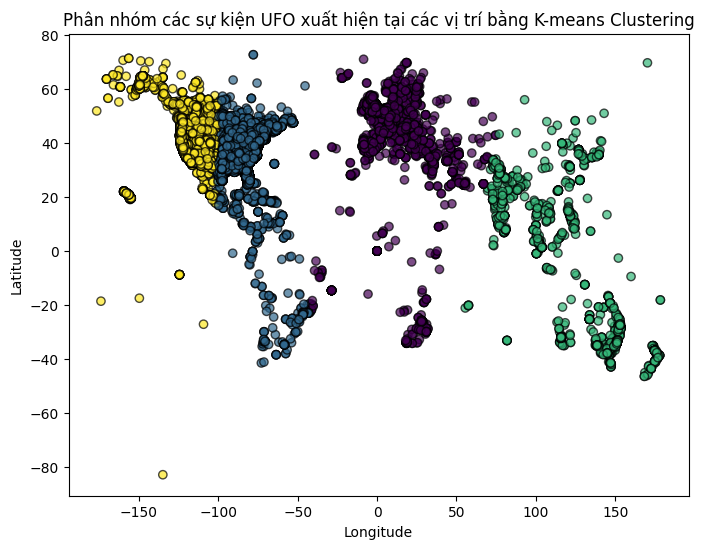

In [62]:
# K-Means Clustering

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chọn các đặc điểm chung để sử dụng cho việc phân nhóm
features = df[['latitude', 'longitude']]

# Sử dụng K-means Clustering để phân nhóm dữ liệu thành 3 cụm (có thể điều chỉnh số lượng cụm)
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)

# Gán nhãn cho mỗi dòng dữ liệu trong DataFrame
df['Cluster'] = kmeans.labels_

# Vẽ biểu đồ các cụm
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['Cluster'], cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.xlabel('Longitude') #kinh độ
plt.ylabel('Latitude') #vĩ độ
plt.title('Phân nhóm các sự kiện UFO xuất hiện tại các vị trí bằng K-means Clustering')
plt.show()


In [63]:
# rewrite data index
df.index = np.arange(0, len(df))

In [64]:
#điền giá trị no comment vào giá trị Nan
df['comments'].fillna('no comment', inplace=True)
#kiểm tra còn bao nhiêu giá trị Nan
df['comments'].isnull().sum()

0

In [65]:
df['state'].fillna('unknown', inplace=True)
df['state'].isnull().sum()

0

In [66]:
df['country'].fillna('unknown', inplace=True)
df['country'].isnull().sum()

0

In [67]:
print(df.isnull().sum())

datetime                   0
city                       0
state                      0
country                    0
shape                      0
duration (seconds)         2
duration (hours/min)    2245
comments                   0
date posted                0
latitude                   0
longitude                  0
date                       0
time                       0
duration (minutes)         2
duration (hours)           2
Cluster                    0
dtype: int64


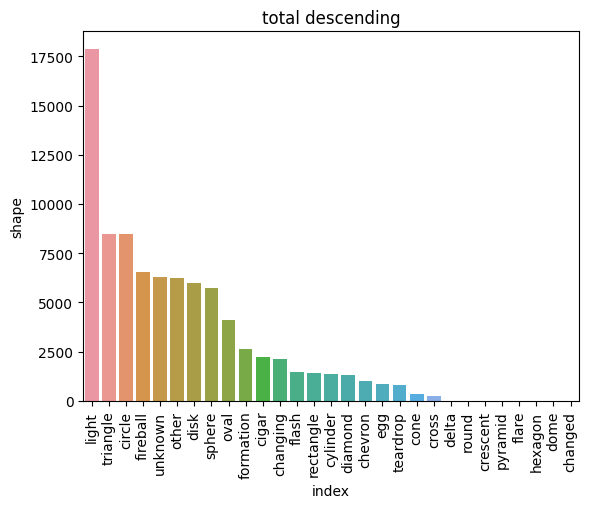

In [68]:
appear = pd.DataFrame(df['shape'].value_counts()).reset_index()
plt.xticks(rotation = 90)
ax = sns.barplot(x="index", y="shape", data=appear).set(title='total descending')

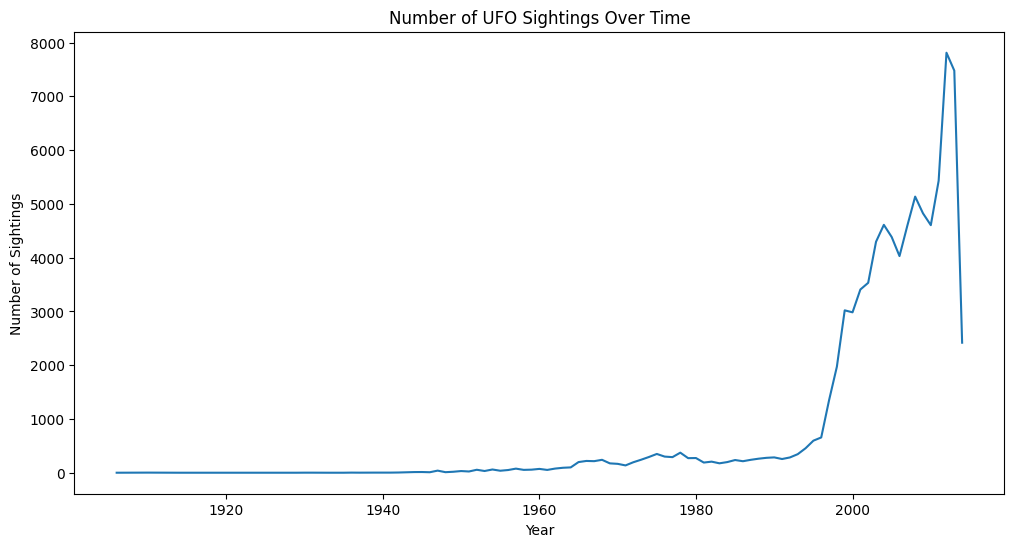

In [69]:
import numpy as np

# Sơ đồ đường: Số lần nhìn thấy theo thời gian
plt.figure(figsize=(12, 6))
sightings_over_time = df['datetime'].dt.year.value_counts().sort_index()
sns.lineplot(x=sightings_over_time.index, y=sightings_over_time.values)
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('Number of UFO Sightings Over Time')
plt.show()

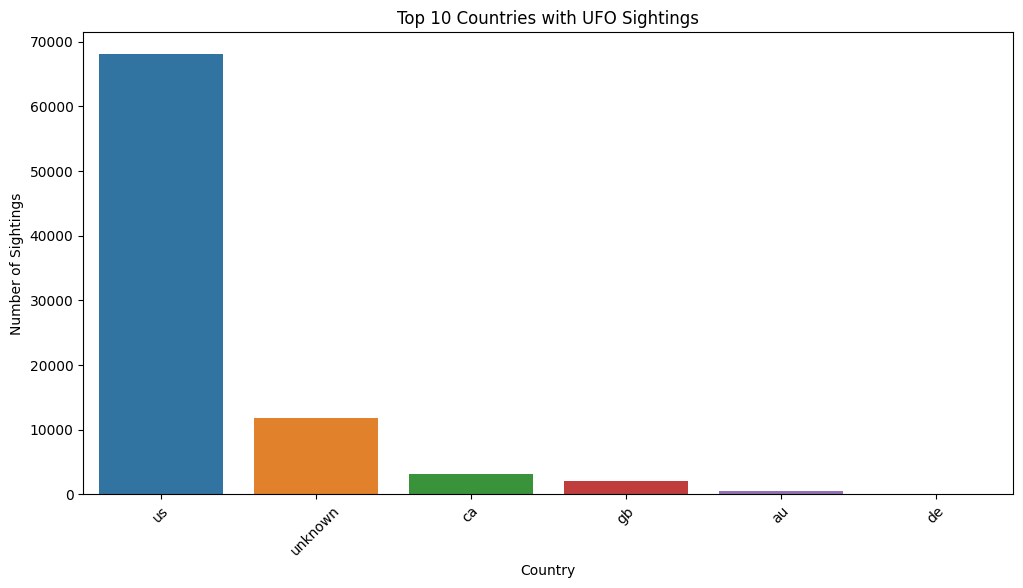

In [70]:
# Sơ đồ quán bar: Số lần nhìn thấy theo quốc gia
plt.figure(figsize=(12, 6))
sightings_by_country = df['country'].value_counts().head(10)
sns.barplot(x=sightings_by_country.index, y=sightings_by_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.title('Top 10 Countries with UFO Sightings')
plt.xticks(rotation=45)
plt.show()

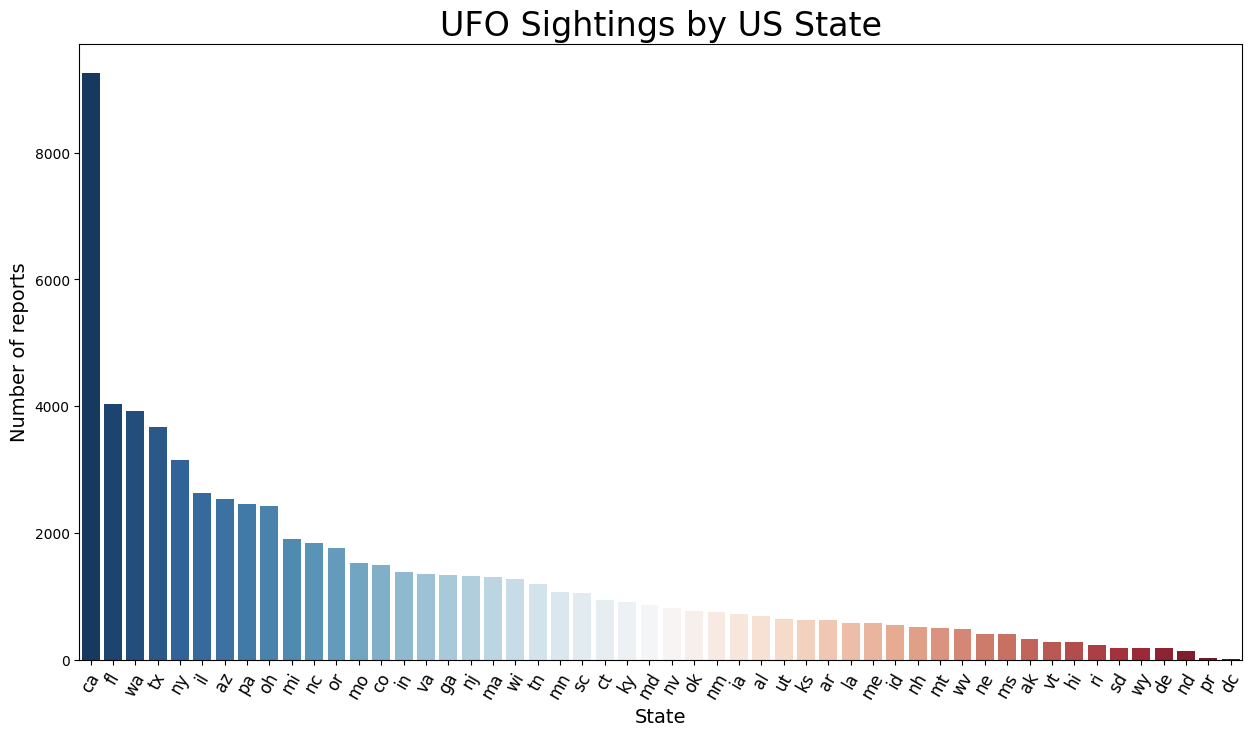

In [71]:
usa_stats = (df['country']=='us')
usdf = df[usa_stats]

state_stats = usdf.state.value_counts()
state_index = state_stats.index
state_values = state_stats.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by US State', fontsize=24)
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
plt.xticks(rotation = 60, size=12)
state_plot = sns.barplot(x=state_index[:60],y=state_values[:60], palette='RdBu_r')

In [72]:
pip install plotly


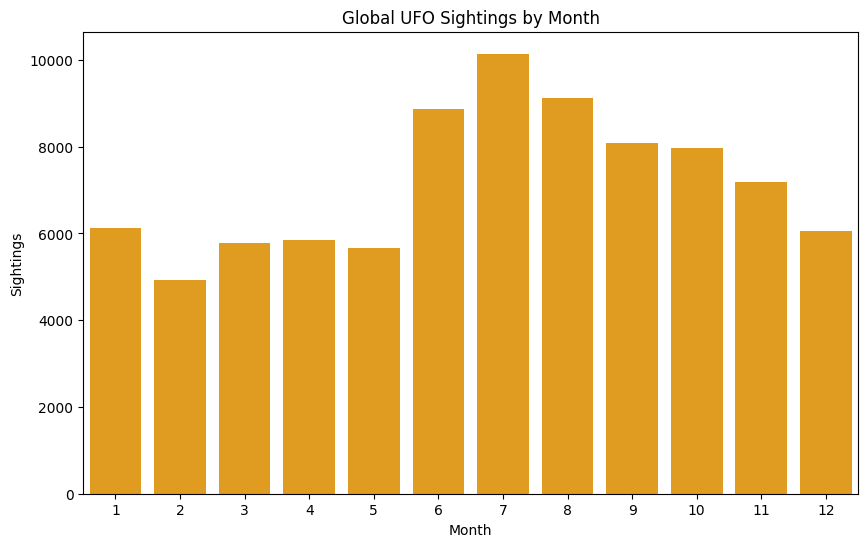

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame chứa dữ liệu
data = df['datetime'].dt.month

# Đếm số lượng sự kiện theo từng tháng và sắp xếp theo thứ tự tháng
month_counts = data.value_counts().sort_index()

# Vẽ biểu đồ cột bằng Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, color='orange')

# Thiết lập tiêu đề và tên trục
plt.title('Global UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Sightings')

# Hiển thị biểu đồ
plt.show()


Word Cloud

In [74]:
import nltk # Natural Language Toolkit library
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re # Thư viện biểu thức chính quy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [75]:
# !!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
text = " ".join([comment for comment in df["comments"]])

# Loại bỏ các ký tự đặc biệt
text = re.sub('[^a-zA-Z0-9\s]', '', text)

# Xóa dấu câu và chuyển sang chữ thường
text = re.sub(r'[^\w\s]', '', text).lower()

# Loại bỏ các từ dừng
#Stop Words Removal: Stop Words là những từ phổ biến (ví dụ: "the," "and") thường bị xóa vì chúng không cung cấp nhiều thông tin có ý nghĩa.
stop_words = set(stopwords.words('english'))
cleaned_words = [word for word in text.split() if word not in stop_words]

In [77]:
%pip install nltk

In [78]:
# Stemming and lemmatization to reduce words to their root form to further simplify the text data.
# Stemming
# từ vựng hóa để rút gọn các từ về dạng gốc nhằm đơn giản hóa hơn nữa dữ liệu văn bản.
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in cleaned_words]
stemmed_string = ''
for word in stemmed_words:
    stemmed_string += word
    stemmed_string += ' '

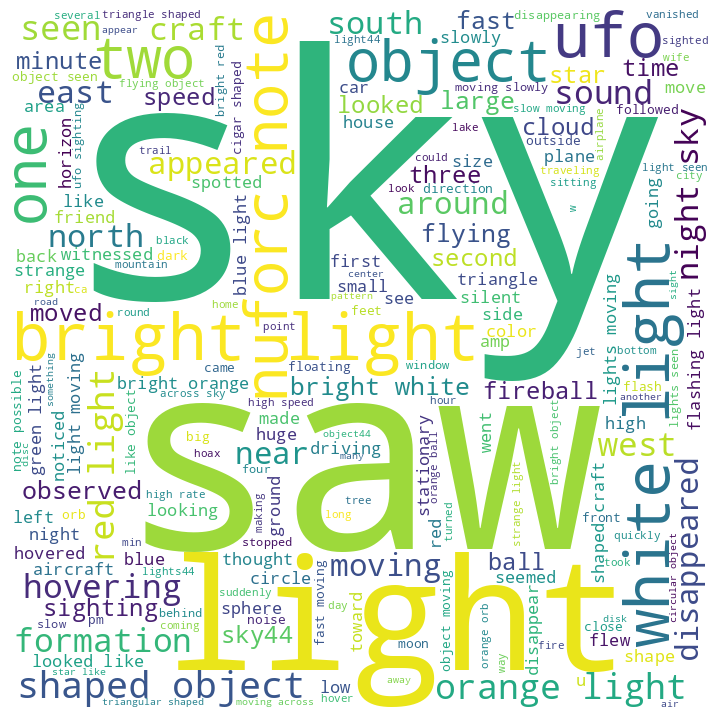

In [79]:
# Without Stemming or lemmatization
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(text)
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

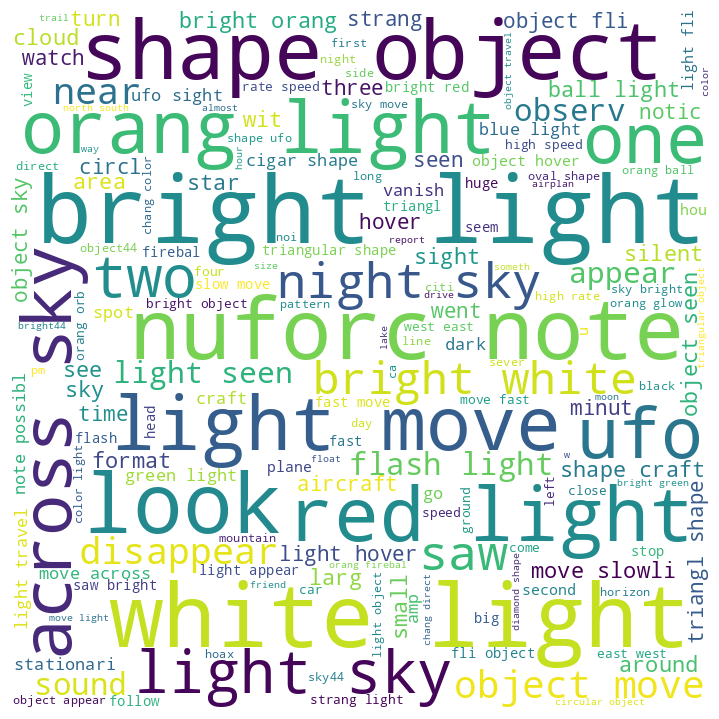

In [80]:
# With Stemming
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(stemmed_string)
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()